In [1]:
import zipfile
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


zip_path = '/content/num+plate.zip'
extract_to = 'dataset'


os.makedirs(extract_to, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted {zip_path} to {extract_to}/")


FileNotFoundError: [Errno 2] No such file or directory: '/content/num+plate.zip'

In [2]:
aug = "aug_data"
os.makedirs(aug, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
extract_to = "dataset"
num_plate_folder = os.path.join(extract_to, "num plate")

for class_folder in os.listdir(num_plate_folder):
    class_path = os.path.join(num_plate_folder, class_folder)
    aug_class_path = os.path.join(aug, class_folder)
    os.makedirs(aug_class_path, exist_ok=True)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)


        for img_name in images:
            try:
                shutil.copy(os.path.join(class_path, img_name), os.path.join(aug_class_path, img_name))
            except:
                continue


        aug_count = 0
        img_cycle = iter(images)

        while aug_count < 100:
            try:
                img_name = next(img_cycle)
            except StopIteration:
                img_cycle = iter(images)
                img_name = next(img_cycle)

            try:
                img_path = os.path.join(class_path, img_name)
                img = Image.open(img_path).convert("RGB").resize((256, 256))
                img_array = np.expand_dims(np.array(img), 0)
                aug_iter = datagen.flow(img_array, batch_size=1)
                aug_img = next(aug_iter)[0].astype(np.uint8)
                aug_pil = Image.fromarray(aug_img)
                aug_pil.save(os.path.join(aug_class_path, f"{img_name.split('.')[0]}_extra{aug_count}.jpg"))
                aug_count += 1
            except:
                continue

In [10]:
train_dir = "processed/train"
test_dir = "processed/test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_folder in os.listdir(aug):
    class_path = os.path.join(aug, class_folder)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        if len(images) == 0:
            print(f"No images found for class {class_folder}. Skipping...")
            continue

        train_imgs, test_imgs = train_test_split(images, test_size=0.05, random_state=42)

        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_folder, img))
        for img in test_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_folder, img))


In [11]:
def preprocess_and_save(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        save_path = os.path.join(output_dir, class_folder)
        os.makedirs(save_path, exist_ok=True)
        for img_file in os.listdir(class_path):
            try:
                img = Image.open(os.path.join(class_path, img_file)).convert("L")
                img = img.resize((128, 128))
                img.save(os.path.join(save_path, img_file))
            except:
                pass

preprocess_and_save(train_dir, "final/train")
preprocess_and_save(test_dir, "final/test")


if not os.listdir(train_dir):
    print("train_dir is empty. Please check if data was copied correctly.")
else:
    sample_class = os.listdir(train_dir)[0]
    sample_img_name = os.listdir(os.path.join(train_dir, sample_class))[0]

    original_img = Image.open(os.path.join(train_dir, sample_class, sample_img_name))
    processed_img = Image.open(os.path.join("final/train", sample_class, sample_img_name))




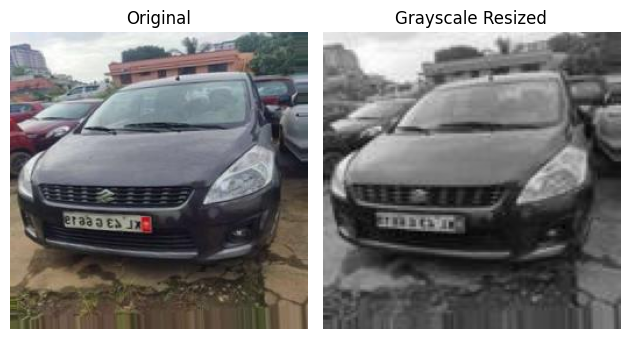

In [12]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grayscale Resized")
plt.imshow(processed_img, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

In [13]:
train_path = 'final/train'
test_path = 'final/test'


In [14]:
final_path = "final"

for split in ["train", "test"]:
    split_path = os.path.join(final_path, split)
    total = 0
    print(f"\nIn '{split}' folder:")
    for class_folder in os.listdir(split_path):
        class_path = os.path.join(split_path, class_folder)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            total += count
            print(f"  {class_folder}: {count} images")
    print(f"Total images in '{split}': {total}")



In 'train' folder:
  KL: 107 images
  DL: 128 images
  GJ: 120 images
  WB: 118 images
  CG: 113 images
  LA: 95 images
  OD: 115 images
  KA: 114 images
  HR: 115 images
  AS: 117 images
  UP: 117 images
  BR: 110 images
  ML: 128 images
  HP: 115 images
  AP: 130 images
  TR: 104 images
  PY: 111 images
  RJ: 101 images
  NL: 102 images
  AN: 101 images
  TN: 104 images
  JK: 126 images
  PB: 120 images
  MZ: 95 images
  DN: 102 images
  UK: 104 images
  TS: 110 images
  CH: 104 images
  JH: 112 images
  AR: 106 images
  SK: 107 images
  MP: 105 images
  MH: 117 images
  MN: 99 images
  GA: 107 images
Total images in 'train': 3879

In 'test' folder:
  KL: 6 images
  DL: 7 images
  GJ: 7 images
  WB: 7 images
  CG: 6 images
  LA: 6 images
  OD: 7 images
  KA: 6 images
  HR: 7 images
  AS: 7 images
  UP: 7 images
  BR: 6 images
  ML: 7 images
  HP: 7 images
  AP: 7 images
  TR: 6 images
  PY: 6 images
  RJ: 6 images
  NL: 6 images
  AN: 6 images
  TN: 6 images
  JK: 7 images
  PB: 7 i

In [15]:


img_size = (128, 128)
batch_size = 35



In [16]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_data.class_indices)

Found 3879 images belonging to 35 classes.
Found 223 images belonging to 35 classes.


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    train_data,
    epochs=24,
    validation_data=test_data,
    callbacks=[checkpoint, early_stop]
)

model.load_weights("best_model.h5")
loss, accuracy = model.evaluate(test_data)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

model.save("final_model.h5")

Epoch 1/24
109/111 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0352 - loss: 3.5580

111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.0354 - loss: 3.5574 - val_accuracy: 0.0807 - val_loss: 3.4775
Epoch 2/24
109/111 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0573 - loss: 3.4639

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0575 - loss: 3.4634 - val_accuracy: 0.0897 - val_loss: 3.3845
Epoch 3/24
109/111 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0886 - loss: 3.3623

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0888 - loss: 3.3621 - val_accuracy: 0.1480 - val_loss: 3.3043
Epoch 4/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1254 - loss: 3.2255 - val_accuracy: 0.1480 - val_loss: 3.1417
Epoch 5/24
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1722 - loss: 3.0249

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1722 - loss: 3.0247 - val_accuracy: 0.1839 - val_loss: 2.9846
Epoch 6/24
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2099 - loss: 2.8699

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2099 - loss: 2.8696 - val_accuracy: 0.1928 - val_loss: 2.9296
Epoch 7/24
109/111 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2798 - loss: 2.5849

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2796 - loss: 2.5849 - val_accuracy: 0.2422 - val_loss: 2.8536
Epoch 8/24
109/111 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3444 - loss: 2.3206

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3438 - loss: 2.3215 - val_accuracy: 0.2780 - val_loss: 2.7663
Epoch 9/24
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3795 - loss: 2.1016

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3797 - loss: 2.1014 - val_accuracy: 0.2870 - val_loss: 2.7143
Epoch 10/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4512 - loss: 1.8038

111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4514 - loss: 1.8035 - val_accuracy: 0.2960 - val_loss: 2.7243
Epoch 11/24
109/111 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5249 - loss: 1.5618

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5250 - loss: 1.5612 - val_accuracy: 0.3453 - val_loss: 2.7337
Epoch 12/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5716 - loss: 1.3772 - val_accuracy: 0.3318 - val_loss: 2.7118
Epoch 13/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6118 - loss: 1.2274 - val_accuracy: 0.3049 - val_loss: 2.8690
Epoch 14/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6518 - loss: 1.1079 - val_accuracy: 0.3318 - val_loss: 3.0794
Epoch 15/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6670 - loss: 1.0255 - val_accuracy: 0.3318 - val_loss: 3.1458
Epoch 16/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7021 - loss: 0.8863 - val_accuracy: 0.3318 - val_loss: 3.0604
Epoch 17/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7121 - loss: 0.8433 - val_accuracy: 0.3274 - val_loss: 3.1825
Epoch 18/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7186 - loss: 0.8312 - val_accuracy

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7593 - loss: 0.7230 - val_accuracy: 0.3632 - val_loss: 3.2884
Epoch 20/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7722 - loss: 0.6682 - val_accuracy: 0.3632 - val_loss: 3.2451
Epoch 21/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7545 - loss: 0.7094 - val_accuracy: 0.3363 - val_loss: 3.4277
Epoch 22/24
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7790 - loss: 0.6325 - val_accuracy: 0.3408 - val_loss: 3.4782
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3728 - loss: 3.2698



Test Accuracy: 36.32%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


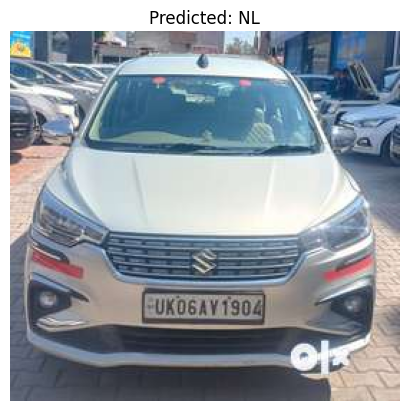

Predicted class: NL


In [27]:
model = load_model("final_model.h5")

def preprocess_image(img_path):
    img = Image.open(img_path).convert("L")
    img = img.resize((128, 128))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    return img_array


img_path = '/content/image.jpeg'
img = preprocess_image(img_path)

prediction = model.predict(img)

predicted_class_index = np.argmax(prediction, axis=1)
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index[0]]


img_show = Image.open(img_path)
plt.imshow(img_show)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


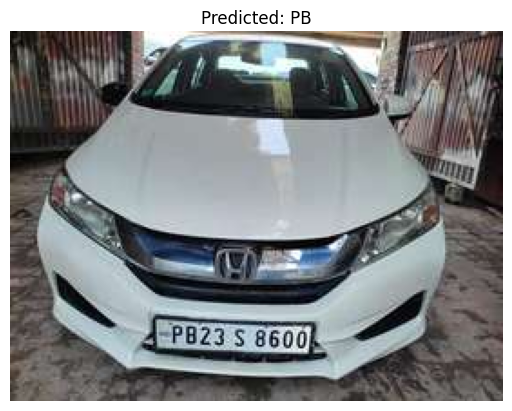

Predicted class: PB


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image


model = load_model("final_model.h5")


def preprocess_image(img_path):
    img = Image.open(img_path).convert("L")
    img = img.resize((128, 128))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    return img_array


img_path = '/content/shuffle_7.jpg'


img = preprocess_image(img_path)

prediction = model.predict(img)


predicted_class_index = np.argmax(prediction, axis=1)
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index[0]]


img_show = Image.open(img_path)
plt.imshow(img_show)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_class}")
